In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
!pip install -U --pre efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from imutils import paths
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np

from efficientnet.tfkeras import EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4

In [55]:
from tensorflow.keras.models import load_model

model = load_model( '/content/drive/MyDrive/TA/GLAUCOMA/model/modelxytrainefficient.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functional  (None, 7, 7, 1280)       4049564   
 )                                                               
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 4,050,845
Trainable params: 4,008,829
Non-trainable params: 42,016
_________________________________________________________________


In [56]:
mata = {'glaucoma': 0, 'normal': 1}

mata

{'glaucoma': 0, 'normal': 1}

1/1 [==============================] - 0s 159ms/step


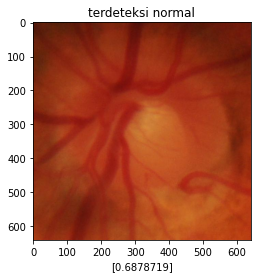

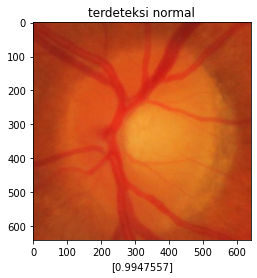

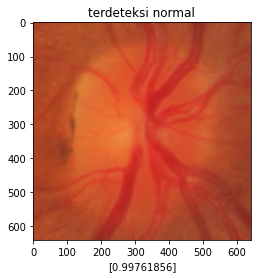

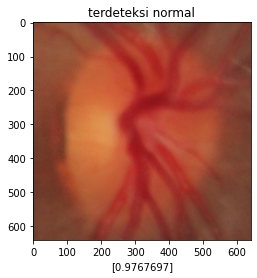

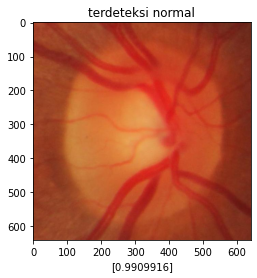

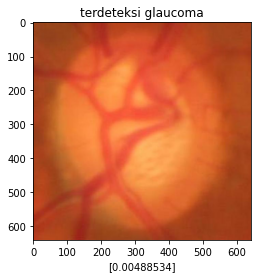

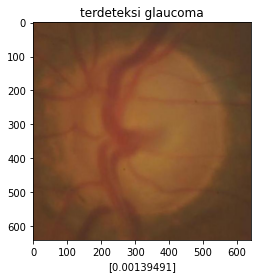

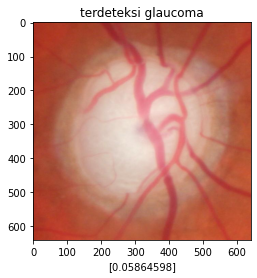

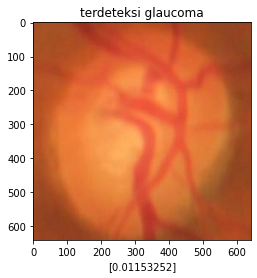

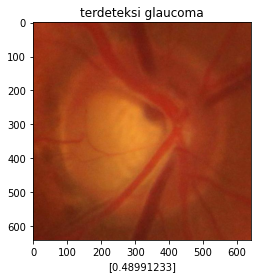

In [57]:
image_path = os.path.join('/content/drive/MyDrive/TA/GLAUCOMA/test')

for a in os.listdir (image_path):
    images = os.path.join(image_path, a)
    images = image.load_img(images, target_size=(224, 224))
    img = image.img_to_array(images)
    img /= 255
    img = np.expand_dims(img, axis=0)
    img = np.vstack([img])
    
    pred = model.predict(img, batch_size=10)

    if pred[0] > 0.5:
      hasil = 'terdeteksi normal'
    else:
      hasil = 'terdeteksi glaucoma'
 

    gambar = mpimg.imread(os.path.join(image_path, a))
    plt.figure()
    plt.imshow(gambar)
    plt.title(hasil)
    plt.xlabel(pred[0])